<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day22_Skin_diseas_detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
import time

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# # Load and the prepare the MNIST dataset to be acceptable for the model
# (x_train,y_train),(x_test,y_test)= mnist.load_data()
# x_train=x_train.reshape(-1,784)/255.0
# x_test=x_test.reshape(-1,784)/255.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Data_Science_Boot_Camp/week6/day_22/hmnist_28_28_RGB.csv")
dataset

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
dataset.shape

(10015, 2353)

In [ ]:
data=dataset[dataset.columns[:-1]]
data


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,181,208,185,187,208,186,186,206,187,189
10011,2,3,1,38,33,32,121,104,103,132,...,129,96,79,76,24,23,21,3,4,1
10012,132,118,118,167,149,149,175,156,160,184,...,190,204,181,178,181,159,153,172,151,145
10013,160,124,146,164,131,152,167,127,146,169,...,165,185,162,167,184,157,166,185,162,172


## Exclude the last column which was "label" but not a pixel information

In [ ]:
data.shape
dataset.tail

<bound method NDFrame.tail of        pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pi

# Converting the first array in to RGB image

In [ ]:
first_image=data.loc[:0] # Accesing the image on first location of array
first_image.shape
first_image_array= np.array(first_image)


# Converting the image into RGB image

In [ ]:
rgb_image=first_image_array.reshape(28,28,3)

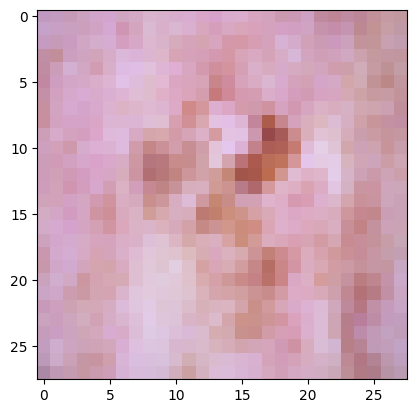

In [ ]:
plt.imshow(rgb_image)

# Label extraction


In [ ]:
yy=np.array(dataset[["label"]])

In [ ]:
xx=np.array(data)
xx.shape

(10015, 2352)

In [ ]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.20)

In [ ]:
print(xx_train.shape, xx_test.shape, yy_train.shape, yy_test.shape)

(8012, 2352) (2003, 2352) (8012, 1) (2003, 1)


In [ ]:

# Build a simple ANN architecture (input layer = 1, hidden layers= 2, output layer= 1)
annmodel= Sequential([
    Dense(128,activation="relu",input_shape=(2352,)),

    Dense(64,activation="relu"),
    Dense(32,activation="relu"),

    Dense(7,activation="softmax")
])

In [ ]:
# Compile the model
annmodel.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [ ]:
#Train the model
s= time.time()
annmodel.fit(xx_train,yy_train,epochs=15, batch_size= 64, validation_data=(xx_test,yy_test) )
E= time.time()

Epoch 1/15
126/126 [==============================] - 7s 6ms/step - loss: 1.1668 - accuracy: 0.6714 - val_loss: 1.1604 - val_accuracy: 0.6605
Epoch 2/15
126/126 [==============================] - 1s 5ms/step - loss: 1.1276 - accuracy: 0.6717 - val_loss: 1.1575 - val_accuracy: 0.6605
Epoch 3/15
126/126 [==============================] - 1s 5ms/step - loss: 1.1270 - accuracy: 0.6717 - val_loss: 1.1605 - val_accuracy: 0.6605
Epoch 4/15
126/126 [==============================] - 1s 5ms/step - loss: 1.1264 - accuracy: 0.6717 - val_loss: 1.1568 - val_accuracy: 0.6605
Epoch 5/15
126/126 [==============================] - 1s 6ms/step - loss: 1.1266 - accuracy: 0.6717 - val_loss: 1.1590 - val_accuracy: 0.6605
Epoch 6/15
126/126 [==============================] - 1s 6ms/step - loss: 1.1258 - accuracy: 0.6717 - val_loss: 1.1598 - val_accuracy: 0.6605
Epoch 7/15
126/126 [==============================] - 1s 6ms/step - loss: 1.1266 - accuracy: 0.6717 - val_loss: 1.1556 - val_accuracy: 0.6605
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_acc= annmodel.evaluate(xx_test,yy_test)
#joblib.dump(cnnmodel,"cnnmodel.joblib" )
print(f"Test Accuracy: {test_acc}")
print("Total time take while Training ",E-s)

63/63 [==============================] - 0s 2ms/step - loss: 1.1564 - accuracy: 0.6605
Test Accuracy: 0.6605092287063599
Total time take while Training  21.49565052986145


# Predicted Output

In [ ]:
xx_test[0].reshape(-1,784*3).shape

(1, 2352)

In [ ]:
a = 5
pred = annmodel.predict(xx_test[a].reshape(-1,784*3))
idx = np.where(pred == np.max(pred))[1]
print(idx)

1/1 [==============================] - 0s 240ms/step
[4]


In [ ]:
yy_test[a]

array([4])

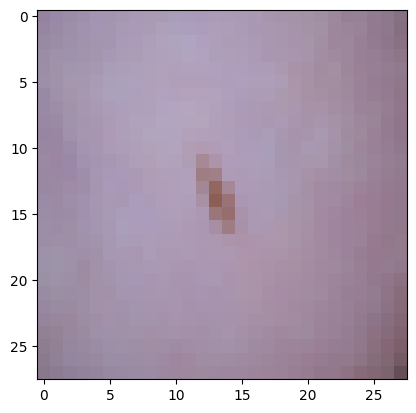

In [ ]:
plt.imshow(xx_test[0].reshape(28, 28, 3))